In [10]:
import rastereasy


# Adapting spectral bands with optimal transport

Read images, info and plot them

In [11]:
image1=rastereasy.Geoimage('./data/demo/source.tif')
image2=rastereasy.Geoimage('./data/demo/target.tif')
image1.info()
image2.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (41.88007631, -4.51648135)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32630
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.000728597449909  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (41.88003619, -4.51641528)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}




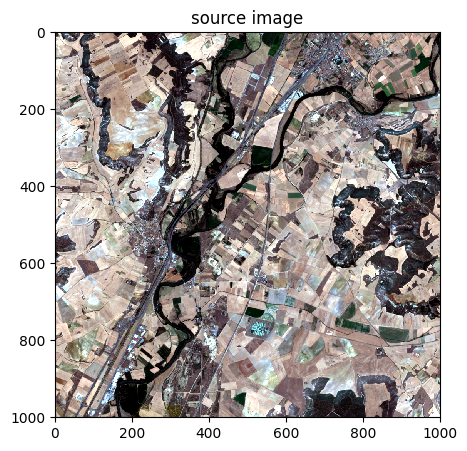

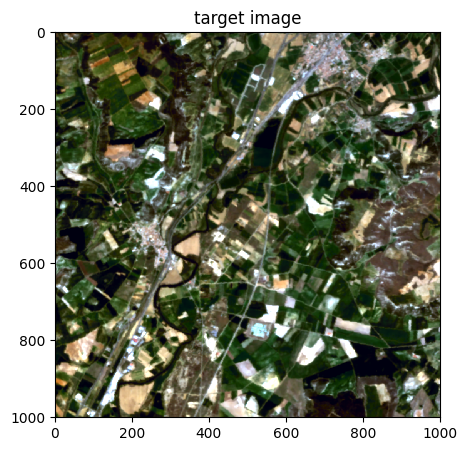

In [12]:
image1.colorcomp(extent='pixel', title='source image')
image2.colorcomp(extent='pixel', title = 'target image')


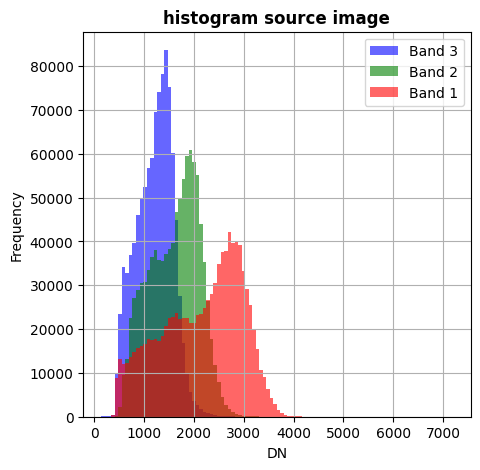

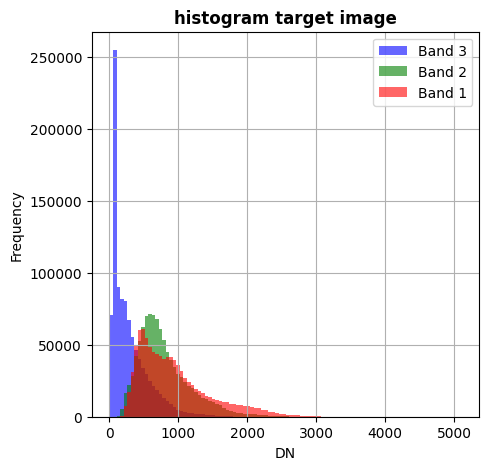

In [13]:
image1.hist(superpose=True, title='histogram source image')
image2.hist(superpose=True, title='histogram target image')


Domain adaptation. Two possibilities : 


1. return an adapted image (`image1.adapt` function)
2. directly modify the image (`image1.adapt` function with `inplace=True` option)

In [14]:
help(image1.adapt)

Help on method adapt in module rastereasy.rastereasy:

adapt(imt, tab_source=None, nb=1000, mapping='gaussian', reg_e=0.1, mu=1.0, eta=0.01, bias=False, max_iter=20, verbose=True, sigma=1, inplace=False) method of rastereasy.rastereasy.Geoimage instance
    Adjust spectral characteristics to match a target image.
    
    This method adapts the spectral characteristics of the current image to match
    those of a target image using optimal transport methods. This is useful for
    harmonizing images from different sensors or acquisitions.
    
    Parameters
    ----------
    imt : Geoimage or numpy.ndarray
        Target image serving as a reference for spectral adjustment,
        or a NumPy array of shape (N, bands) containing N spectral samples.
    tab_source : numpy.ndarray, optional
        Required if `imt` is a NumPy array. Must be an array of shape (M, bands)
        containing spectral samples from the source image.
    nb : int, optional
        Number of random samples us

# 1) Adaptation

In [15]:
image1_adapted = image1.adapt(image2,mapping='emd')


Fitting transport model using emd method...
Transforming data...
Adaptation complete.


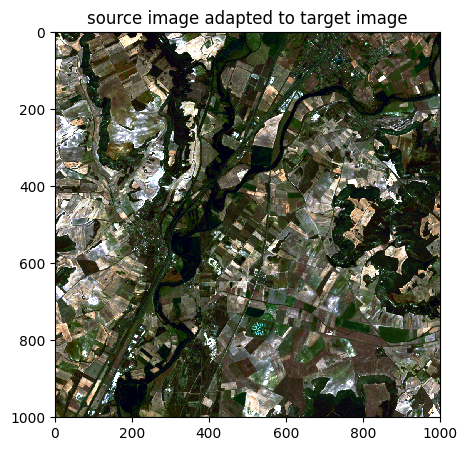

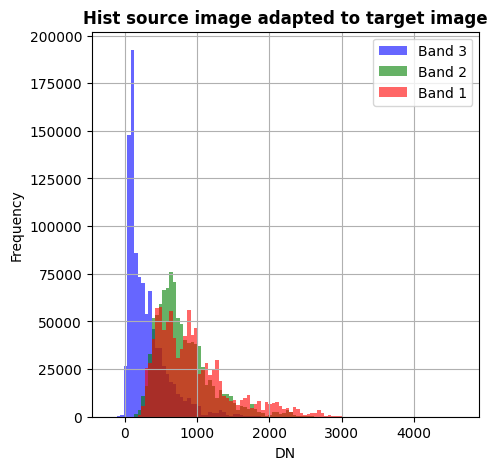

In [16]:
image1_adapted.colorcomp(title='source image adapted to target image',extent='pixel')
image1_adapted.hist(superpose=True,title='Hist source image adapted to target image')

# 2) By modifying the image directly `inplace=True` option

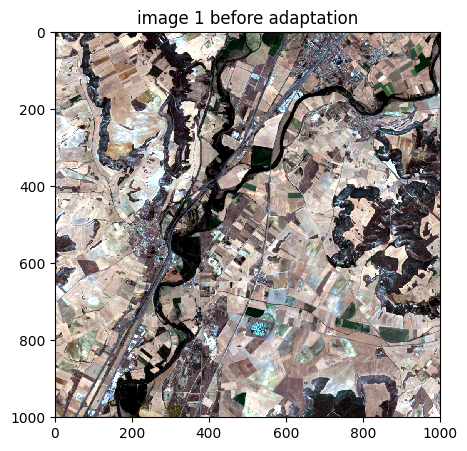

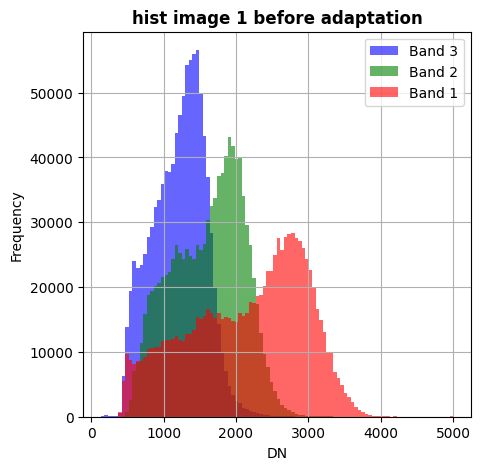

In [17]:
image1.colorcomp(title='image 1 before adaptation',extent='pixel')
image1.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 before adaptation')


In [18]:
image1.adapt(image2,mapping='emd',inplace=True)


Fitting transport model using emd method...
Transforming data...
Adaptation complete.


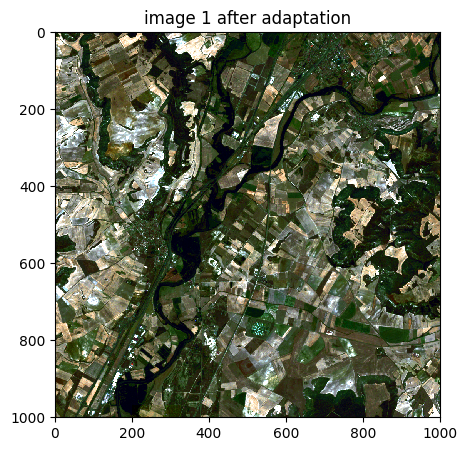

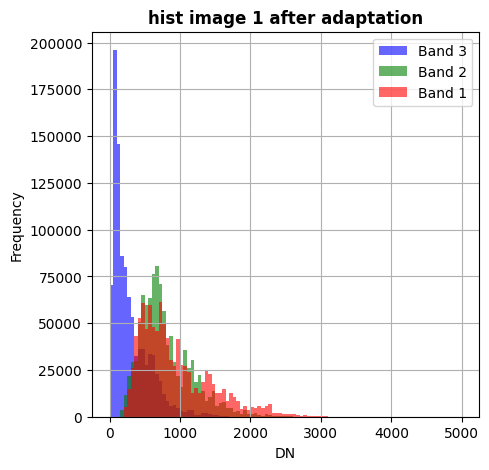

In [19]:
image1.colorcomp(title='image 1 after adaptation',extent='pixel')
image1.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 after adaptation')


# 2) By manually selecting the samples


# Important for google colab

To use the interactive plotting features in Google Colab, a special two-step setup is required. Follow these steps in the exact order. Separating the commands into different cells and restarting the session is **essential**.

### Step 1: Install Libraries

Run the following cell to install `rastereasy` and the necessary dependencies for interactive widgets.

```
!pip install rastereasy ipympl
from google.colab import output
output.enable_custom_widget_manager()
```

### Step 2: Restart the Runtime

After the installation is complete, you **must** restart the runtime.

Go to the menu: ``Runtime > Restart runtime`` (or use the shortcut `Ctrl+M`).

### Step 3: Run Your Code

After restarting, you can now enable the interactive mode and use the library in a **new cell**.

```
%matplotlib widget
import rastereasy
```



In [20]:
image1=rastereasy.Geoimage('./data/demo/source.tif')
image2=rastereasy.Geoimage('./data/demo/target.tif')
image1.info()
image2.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (41.88007631, -4.51648135)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32630
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 3
- Spatial resolution: 10.000728597449909  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (41.88003619, -4.51641528)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3}




nootebook


Label(value='Click on the image to retrieve spectra.')

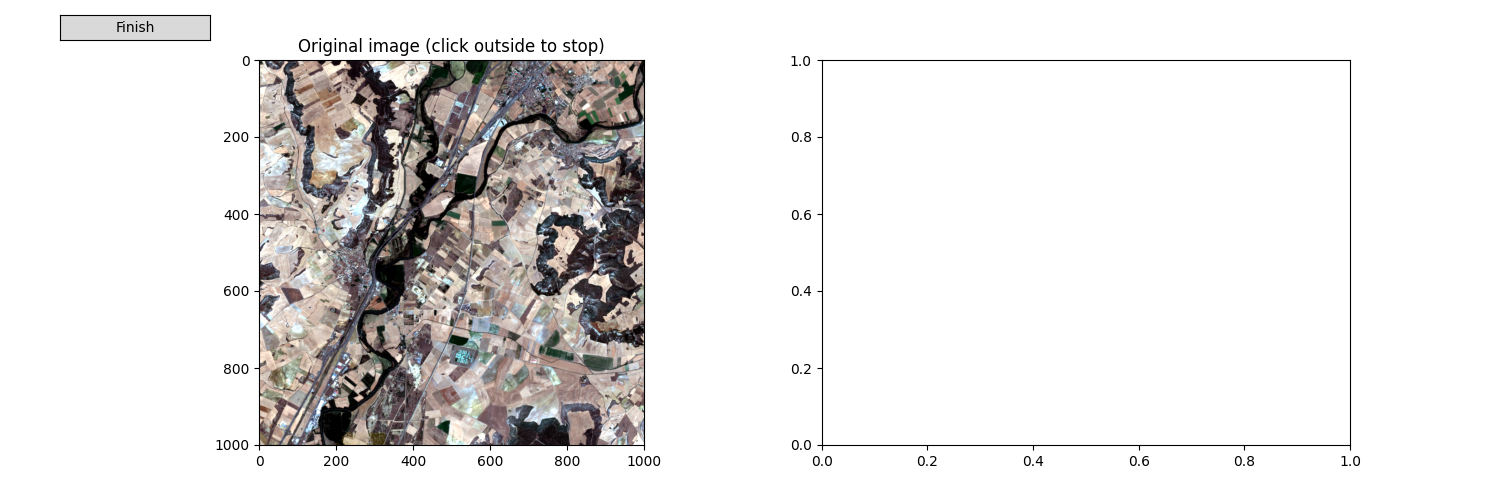

In [21]:
# If google colab, do not forget to put `%matplotlib widget` before importing rastereasy
samples_source,_,_=image1.plot_spectra()

nootebook


Label(value='Click on the image to retrieve spectra.')

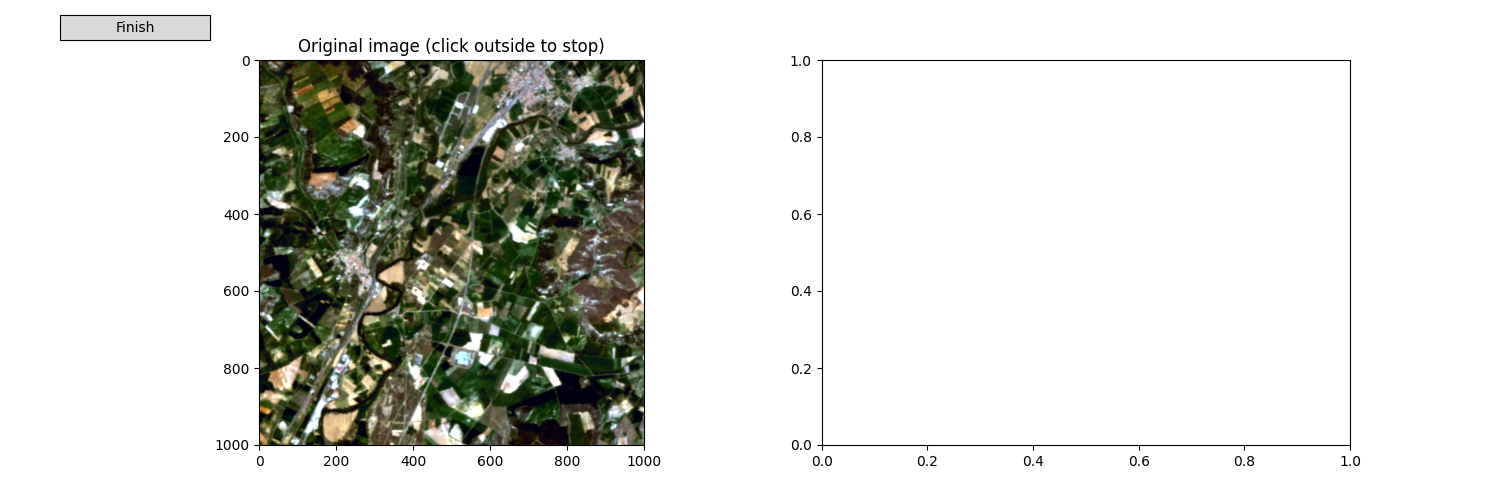

In [22]:
# If google colab, do not forget to put `%matplotlib widget` before importing rastereasy
samples_target,_,_=image2.plot_spectra()

In [23]:
print('size of sample source = ',len(samples_source))
print('size of sample target = ',len(samples_target))

size of sample source =  65
size of sample target =  58


In [24]:
import numpy as np


In [25]:
image1_adapted = image1.adapt(np.array(samples_target),np.array(samples_source),mapping='sinkhorn')


Fitting transport model using sinkhorn method...
Transforming data...
Adaptation complete.


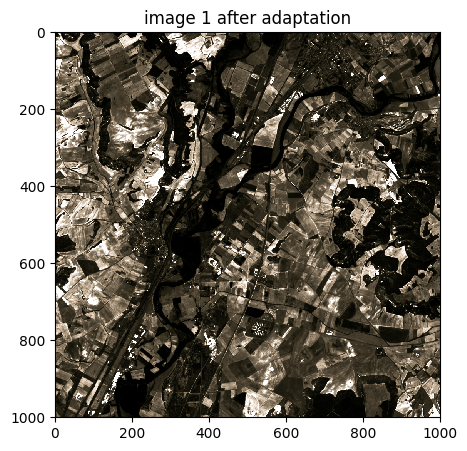

In [26]:
image1_adapted.colorcomp(extent='pixel', title = 'image 1 after adaptation')

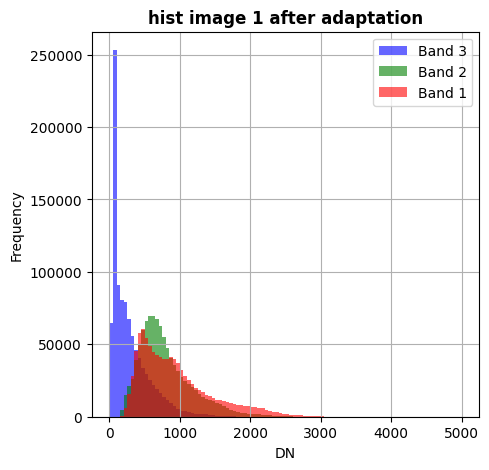

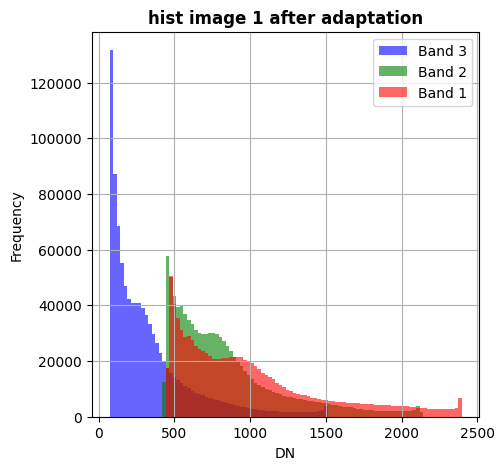

In [27]:
image2.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 after adaptation')
image1_adapted.hist(superpose=True,xmin=0,xmax=5000,title = 'hist image 1 after adaptation')
